# HemoCell Visualizations for the article

In [1]:
import numpy as np
import pandas as pd

import tqdm

import matplotlib.pyplot as plt

from lxml import etree

from SALib.sample import saltelli
from SALib.analyze import sobol

from sklearn.neighbors.kde import KernelDensity
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,WhiteKernel

import statsmodels.api as sm

from local_config import *

print(plt.style.available)
#plt.style.use("ggplot")

figpath = "/home/kevin/master_project/figures_for_paper"
figformat = "jpeg"
figdpi = 500

#titlefontsize = 24
#axisfontsize = 24
#labelfontsize = 20

plt.rcParams["xtick.labelsize"] = 18
plt.rcParams["ytick.labelsize"] = 18

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titleweight"] = "bold"

plt.rcParams['figure.dpi'] = figdpi

plt.rcParams["font.family"] = "Arial"

['seaborn-muted', 'seaborn-deep', 'seaborn-ticks', 'seaborn-dark', 'dark_background', 'seaborn-pastel', 'seaborn-darkgrid', 'seaborn-colorblind', 'tableau-colorblind10', 'fivethirtyeight', 'seaborn-talk', 'grayscale', '_classic_test', 'seaborn', 'seaborn-white', 'fast', 'bmh', 'ggplot', 'classic', 'seaborn-poster', 'seaborn-dark-palette', 'seaborn-paper', 'Solarize_Light2', 'seaborn-notebook', 'seaborn-whitegrid', 'seaborn-bright']


In [2]:
mode = "visc"
cellHealth = "healthy"
lmax = 1

HC_nburn = 0
GP_nburn = 0

if cellHealth == "healthy":
    imin = 2
    imax = 8
    
    HC_violin_color = "green"
    HC_cmap = "Greens"
    
    GP_violin_color = "red"
    GP_cmap = "Reds"
elif cellHealth == "treated":
    imin = 4
    imax = 10
    
    HC_violin_color = "orange"
    HC_cmap = "Oranges"
    
    GP_violin_color = "blue"
    GP_cmap = "Blues"

# Load results from posterior sampling

# HemoCell model
HC_df = pd.read_csv("%s/TMCMC_hemocell_%s_samples_%s_%i_%i_lmax_%i_nburn_%i.csv" % 
                    (outputpath,cellHealth,mode,imin,imax,lmax,HC_nburn),sep=";")

HC_qoi = np.load("%s/TMCMC_hemocell_%s_qoi_%s_%i_%i_lmax_%i_nburn_%i.npy" % 
                 (outputpath,cellHealth,mode,imin,imax,lmax,HC_nburn))

HC_c_err = np.load("%s/TMCMC_hemocell_%s_c_err_%s_%i_%i_lmax_%i_nburn_%i.npy" % 
                   (outputpath,cellHealth,mode,imin,imax,lmax,HC_nburn))

# Gaussian Process model
GP_df = pd.read_csv("%s/TMCMC_GP_%s_samples_%s_%i_%i_lmax_%i_nburn_%i.csv" % 
                    (outputpath,cellHealth,mode,imin,imax,lmax,GP_nburn),sep=";")

GP_qoi = np.load("%s/TMCMC_GP_%s_qoi_%s_%i_%i_lmax_%i_nburn_%i.npy" % 
                 (outputpath,cellHealth,mode,imin,imax,lmax,GP_nburn))

GP_c_err = np.load("%s/TMCMC_GP_%s_c_err_%s_%i_%i_lmax_%i_nburn_%i.npy" % 
                   (outputpath,cellHealth,mode,imin,imax,lmax,GP_nburn))

# Load data for comparison with results
data = pd.read_csv("%s/Ekcta_100.csv" % (datapath),sep=";")
data = data.loc[data["Treatment"] == 0.5]

if cellHealth == "treated":
    stress,el,el_err = data.values[imin:imax,[1,3,4]].T    
elif cellHealth == "healthy":
    stress,el = data.values[imin:imax,[1,2]].T 
    el_err = np.zeros(el.shape)

# Parameter names
params = ["kLink","kBend"]

if mode == "visc":
    params.append("viscosityRatio")

#params = params + ["err"]
    
    
names = {"kLink":r"$\mathbf{\kappa_l}$","kBend":r"$\mathbf{\kappa_b}$",
         "viscosityRatio":r"$\mathbf{\Lambda}$","err":r"$\mathbf{\sigma^m}$",
         "shearrate":r"$\mathbf{\dot{\gamma}}$ [$\mathbf{s^{-1}}$]"}

# Data visualizations

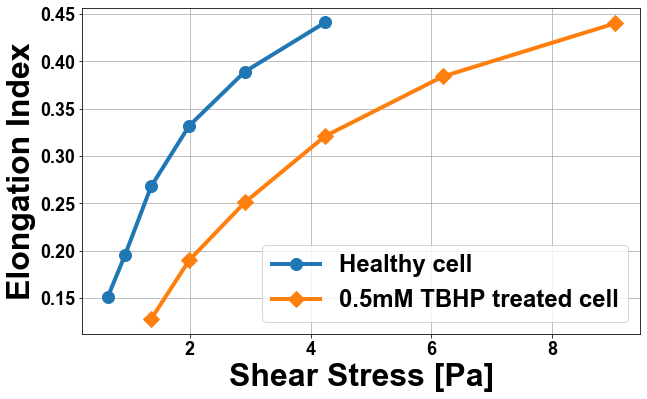

In [3]:
full_stress,el_healthy,el_treated,el_treated_err = data.values[0:10,[1,2,3,4]].T

dx = full_stress[1:] - full_stress[:-1]
dy_healthy = el_healthy[1:] - el_healthy[:-1]
dy_treated = el_treated[1:] - el_treated[:-1]

x = (full_stress[:-1] + full_stress[1:]) / 2

plt.figure(figsize=(10,6))

plt.xlabel("Shear Stress [Pa]",fontsize=32)
plt.ylabel("Elongation Index",fontsize=32)
plt.grid(True)
plt.plot(full_stress[2:8],el_healthy[2:8],"o-",linewidth=4,markersize=12,label="Healthy cell")
plt.plot(full_stress[4:10],el_treated[4:10],"D-",linewidth=4,markersize=12,label="0.5mM TBHP treated cell")

plt.legend(fontsize=24)
plt.savefig("%s/ektacytometry_data.%s" % (figpath,figformat),dpi=figdpi,bbox_inches="tight")

# Model performance comparison

Shear stress: 0.640000, Shear rate: 567.627494

249 µs ± 33.7 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)

Shear stress: 0.930000, Shear rate: 824.833703

253 µs ± 37.4 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)

Shear stress: 1.360000, Shear rate: 1206.208426

248 µs ± 12.5 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)

Shear stress: 1.990000, Shear rate: 1764.966741

254 µs ± 21.6 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)

Shear stress: 2.910000, Shear rate: 2580.931264

249 µs ± 11.9 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)

Shear stress: 4.240000, Shear rate: 3760.532151

252 µs ± 13 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)

Shear stress: 6.190000, Shear rate: 5490.022173

254 µs ± 31 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)

Shear stress: 9.040000, Shear rate: 8017.738359

244 µs ± 10.9 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)

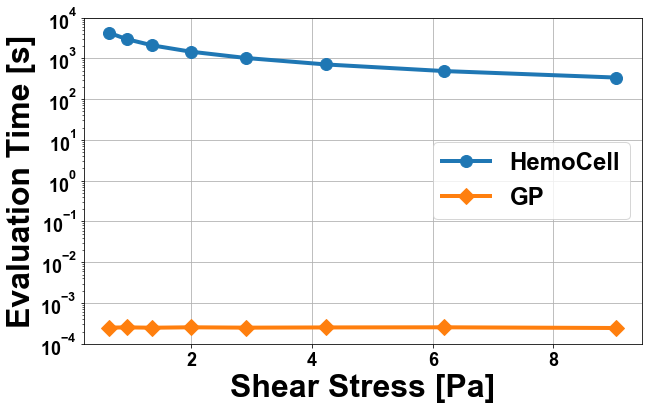

In [4]:
HC_performance = {0.64:4259.28,
                  0.93:2975.48,
                  1.36:2085.16, 
                  1.99:1465.24, 
                  2.91:1023.44, 
                  4.24:709.67, 
                  6.19:489.48, 
                  9.04:339.02
                 }

GP_performance = {0.64:249e-6,
                  0.93:253e-6,
                  1.36:248e-6, 
                  1.99:254e-6, 
                  2.91:249e-6, 
                  4.24:252e-6, 
                  6.19:254e-6, 
                  9.04:244e-6
                 }

GP_performance_std = {0.64:33.7e-6,
                      0.93:37.4e-6,
                      1.36:12.5e-6, 
                      1.99:21.6e-6, 
                      2.91:11.9e-6, 
                      4.24:13e-6, 
                      6.19:31e-6, 
                      9.04:10.9e-6}

plt.figure(figsize=(10,6))
plt.xlabel("Shear Stress [Pa]",fontsize=32)
plt.ylabel("Evaluation Time [s]",fontsize=32)

plt.yscale("log")
plt.ylim(10**-4,10**4)
plt.yticks(10**np.arange(-4,5,dtype=np.float))
plt.grid(True)

plt.plot(list(HC_performance.keys()),list(HC_performance.values()),"o-",
         linewidth=4,markersize=12,label="HemoCell")

plt.plot(list(GP_performance.keys()),list(GP_performance.values()),"D-",
         linewidth=4,markersize=12,label="GP")

plt.legend(fontsize=24)
plt.savefig("%s/performance_comparison.%s" % (figpath,figformat),dpi=figdpi,bbox_inches="tight")

# SA visualizations

## Train prediction model for imputation

In [5]:
# Seed used for Master Thesis
np.random.seed(6345789)

# Load simulation data
mode="visc"

imin = 0
imax = 10

# Load simulation data
x_train = np.load("%s/train_hemocell_samples_%s_%i_%i.npy" % (outputpath,mode,imin,imax))
y_train = np.load("%s/train_hemocell_qoi_%s_%i_%i.npy" % (outputpath,mode,imin,imax))
c_err = np.load("%s/train_hemocell_c_err_%s_%i_%i.npy" % (outputpath,mode,imin,imax))

x_fail = x_train[y_train[:,0] < 0,:-3]

# Remove failed simulation outputs
x_train = x_train[y_train[:,0] >= 0,:-3]
c_err = c_err[y_train[:,0] >= 0]
y_train = y_train[y_train[:,0] >= 0]

In [6]:
def singleModel(x_train,y_train,n_restarts=0):
    kernel = RBF() + WhiteKernel()
    return GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=n_restarts).fit(x_train,y_train)

def multipleModels(x_train,y_train,n_restarts=0):
    params,shearrates = x_train[:,:-1],x_train[:,-1]
    
    kernels = {shearrate : RBF() + WhiteKernel() for shearrate in np.unique(shearrates)}
    
    predictionModels = {}
    for shearrate in np.unique(shearrates):
        model = GaussianProcessRegressor(kernel=kernels[shearrate],
                                         n_restarts_optimizer=n_restarts).fit(params[shearrate == shearrates],
                                                                              y_train[shearrate == shearrates])
        
        predictionModels[shearrate] = model
        
    return predictionModels
    
# Train prediction model
model = multipleModels(x_train,y_train,n_restarts=10)

In [7]:
def predictionModel(x,return_std=False):
    if type(model) is dict:
        return model[x[0,-1]].predict(x[:,:-1],return_std=return_std)
    else:
        return model.predict(x,return_std=return_std)

## HemoCell imputation and plots

In [8]:
imputation = "GP_model"

imin = 2
imax = 10

# Load data for comparison with results
data = pd.read_csv("%s/Ekcta_100.csv" % (datapath),sep=";")
data = data.loc[data["Treatment"] == 0.5]
stress,el,el_err = data.values[imin:imax,[1,3,4]].T

# Get data from config files
configpath = "%s/hemocell/templates/config_template.xml" % (libpath)
tree = etree.parse(configpath, parser=etree.XMLParser(remove_blank_text=True, remove_comments=True))
root = tree.getroot()
nuP = float(root.find("domain/nuP").text)
rhoP = float(root.find("domain/rhoP").text)

# Compute the shear rates
shearrate = stress / (nuP * rhoP)

model_params = ["kLink","kBend","viscosityRatio"]

# Set the bounds on the parameters
bounds = [[10.0,300.0],
          [50.0,400.0],
          [1.0,15.0]
         ]

# Problem for Sobol analysis
sobol_problem = {"num_vars":3,
                 "names":model_params,
                 "bounds":bounds
                }

param_values = saltelli.sample(sobol_problem,1000,calc_second_order=False)
sobol_qoi = np.load("%s/sobol_hemocell_qoi_%s_%i_%i.npy" % (outputpath,mode,imin,imax))

In [9]:
np.random.seed(6345789)

print("Crashed simulations:",np.sum(sobol_qoi < 0))

if imputation == "zero":
    sobol_qoi[sobol_qoi < 0] = 0
elif imputation == "GP_model":  
    sample_idx,var_idx = np.where(sobol_qoi < 0)
    for n in range(sample_idx.size):
        arr = np.array([*param_values[sample_idx[n]],shearrate[var_idx[n]]])[None,:]
        mean = predictionModel(arr)
    
        sobol_qoi[sample_idx[n],var_idx[n]] = mean

print("Imputation sanity check:",np.sum(sobol_qoi < 0))

Crashed simulations: 184
Imputation sanity check: 0


In [10]:
# Get the sobol indices
sobol_indices = [sobol.analyze(sobol_problem,sobol_qoi[:,m],
                               calc_second_order=False) for m in range(shearrate.size)]

S1 = np.array([sobol_indices[m]["S1"] for m in range(shearrate.size)]).T
ST = np.array([sobol_indices[m]["ST"] for m in range(shearrate.size)]).T

S1_conf = np.array([sobol_indices[m]["S1_conf"] for m in range(shearrate.size)]).T
ST_conf = np.array([sobol_indices[m]["ST_conf"] for m in range(shearrate.size)]).T

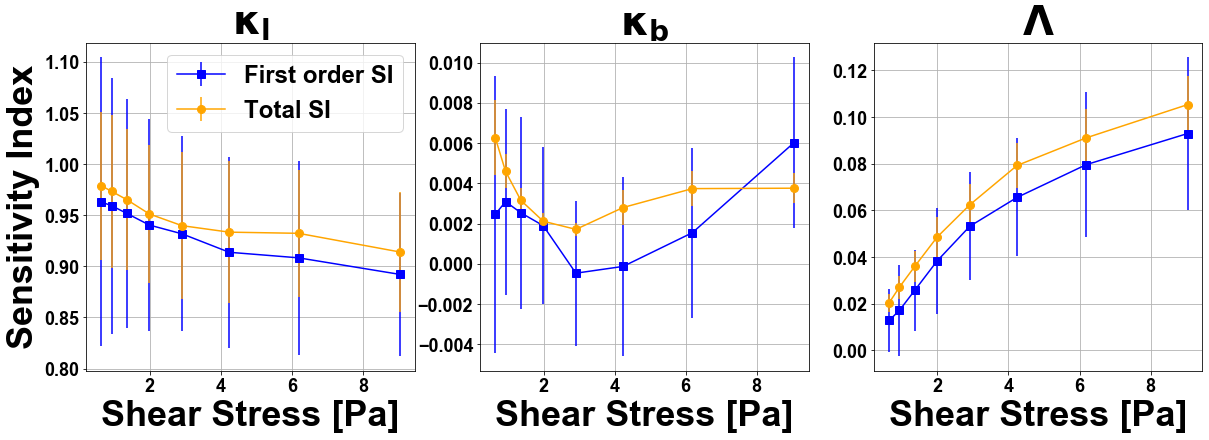

In [11]:
plt.figure(figsize=(20,8))
for n in range(len(model_params)):
    plt.subplot(1,3,n+1)
    plt.title(names[model_params[n]],fontsize=40)
    plt.grid(True)
    plt.xlabel("Shear Stress [Pa]",fontsize=36)
    
    if n == 0:
        plt.ylabel("Sensitivity Index",fontsize=36)
    
    plt.errorbar(stress,S1[n],yerr=S1_conf[n],color="blue",fmt="s-",markersize=8,label="First order SI")
    plt.errorbar(stress,ST[n],yerr=ST_conf[n],color="orange",fmt="o-",markersize=8,label="Total SI")
    
    x0,x1 = plt.gca().get_xlim()
    y0,y1 = plt.gca().get_ylim()

    plt.gca().set_aspect((x1-x0)/(y1-y0))
    
    if n == 0:
        plt.legend(fontsize=24)

plt.savefig("%s/sobol_hemocell_visc_2_10.%s" % (figpath,figformat),dpi=figdpi,bbox_inches="tight")

## GP evaluation and plots

In [12]:
imin = 2
imax = 10

# Load data for comparison with results
data = pd.read_csv("%s/Ekcta_100.csv" % (datapath),sep=";")
data = data.loc[data["Treatment"] == 0.5]
stress = data.values[imin:imax,1]

# Get data from config files
configpath = "%s/hemocell/templates/config_template.xml" % (libpath)
tree = etree.parse(configpath, parser=etree.XMLParser(remove_blank_text=True, remove_comments=True))
root = tree.getroot()
nuP = float(root.find("domain/nuP").text)
rhoP = float(root.find("domain/rhoP").text)

In [13]:
n_samples = 10000

model_params = ["kLink","kBend","viscosityRatio"]

# Compute the shear rates
shearrate = stress / (nuP * rhoP)

# Set the bounds on the parameters
bounds = [[10.0,300.0],
          [50.0,400.0],
          [1.0,15.0]
         ]

# Problem for Sobol analysis
sobol_problem = {"num_vars":3,
                 "names":model_params,
                 "bounds":bounds
                }

param_values = saltelli.sample(sobol_problem,n_samples,calc_second_order=False)

sobol_qoi = np.zeros((param_values.shape[0],shearrate.size))

with tqdm.tqdm(total=sobol_qoi.size) as pbar:
    for n,param_set in enumerate(param_values):
        for m,design_val in enumerate(shearrate):
            arr = np.array([*param_values[n],design_val])[None,:]
            mean = predictionModel(arr)

            sobol_qoi[n,m] = mean
            
            pbar.update()

100%|██████████| 400000/400000 [01:48<00:00, 3688.80it/s]


In [14]:
# Get the sobol indices
sobol_indices = [sobol.analyze(sobol_problem,sobol_qoi[:,m],
                               calc_second_order=False) for m in range(shearrate.size)]

S1 = np.array([sobol_indices[m]["S1"] for m in range(shearrate.size)]).T
ST = np.array([sobol_indices[m]["ST"] for m in range(shearrate.size)]).T

S1_conf = np.array([sobol_indices[m]["S1_conf"] for m in range(shearrate.size)]).T
ST_conf = np.array([sobol_indices[m]["ST_conf"] for m in range(shearrate.size)]).T

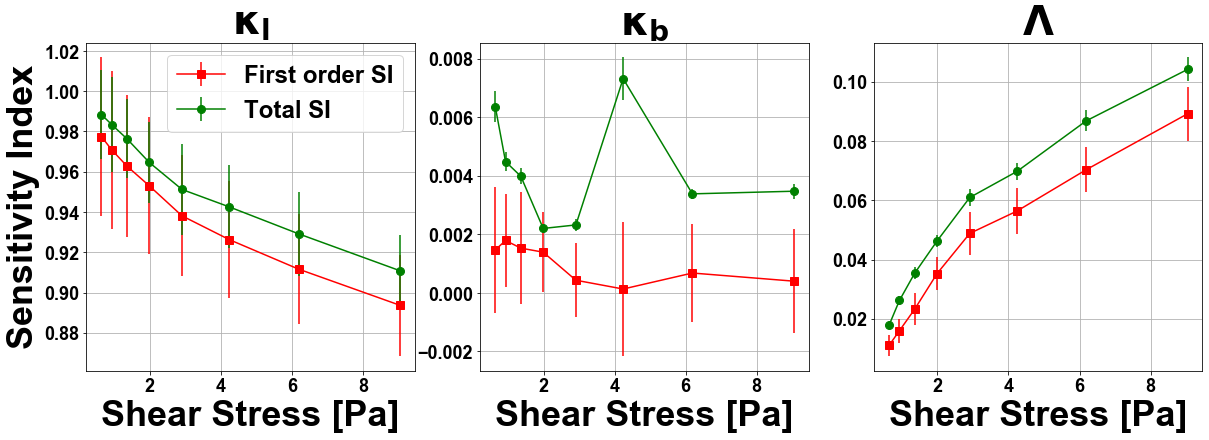

In [15]:
plt.figure(figsize=(20,8))
for n in range(len(model_params)):
    plt.subplot(1,3,n+1)
    plt.title(names[model_params[n]],fontsize=40)
    plt.grid(True)
    plt.xlabel("Shear Stress [Pa]",fontsize=36)
    
    if n == 0:
        plt.ylabel("Sensitivity Index",fontsize=36)
    
    plt.errorbar(stress,S1[n],yerr=S1_conf[n],color="red",fmt="s-",markersize=8,label="First order SI")
    plt.errorbar(stress,ST[n],yerr=ST_conf[n],color="green",fmt="o-",markersize=8,label="Total SI")
    
    x0,x1 = plt.gca().get_xlim()
    y0,y1 = plt.gca().get_ylim()

    plt.gca().set_aspect((x1-x0)/(y1-y0))
    
    if n == 0:
        plt.legend(fontsize=24)

plt.savefig("%s/sobol_GP_visc_2_10.%s" % (figpath,figformat),dpi=figdpi,bbox_inches="tight")

# UQ visualizations

## 1D Marginalized figures (HemoCell & GP together)

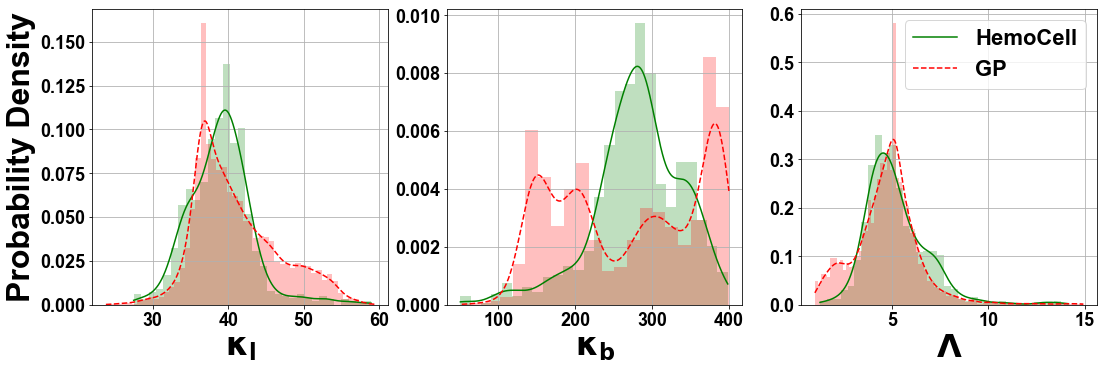

In [16]:
plt.figure(figsize=(18,6))
for n in range(len(params)):
    ax = plt.subplot(1,3,n+1)
    plt.grid(True)
    
    if n == 0:
        plt.ylabel("Probability Density",fontsize=32)
    
    plt.xlabel(names[params[n]],fontsize=32)
    
    HC_vals = HC_df[params[n]].values
    HC_kde = sm.nonparametric.KDEMultivariate(data=HC_vals,var_type="c",bw="normal_reference")
    HC_x_vals = np.linspace(np.min(HC_vals),np.max(HC_vals),1000)
    HC_y_vals = HC_kde.pdf(HC_x_vals)
    
    GP_vals = GP_df[params[n]].values
    GP_kde = sm.nonparametric.KDEMultivariate(data=GP_vals,var_type="c",bw="normal_reference")
    GP_x_vals = np.linspace(np.min(GP_vals),np.max(GP_vals),1000)
    GP_y_vals = GP_kde.pdf(GP_x_vals)
    
    plt.hist(HC_df[params[n]].values,color=HC_violin_color,bins="auto",
             density=True,alpha=0.25)
    
    plt.plot(HC_x_vals,HC_y_vals,'-',color=HC_violin_color,label="HemoCell")
    
    plt.hist(GP_df[params[n]].values,color=GP_violin_color,bins="auto",
             density=True,alpha=0.25)
    
    plt.plot(GP_x_vals,GP_y_vals,'--',color=GP_violin_color,label="GP")
    
    x0,x1 = plt.gca().get_xlim()
    y0,y1 = plt.gca().get_ylim()

    plt.gca().set_aspect((x1-x0)/(y1-y0))
    
ax.legend(fontsize=22)
plt.savefig("%s/TMCMC_%s_1D_marginals.%s" % (figpath,cellHealth,figformat),dpi=figdpi,bbox_inches="tight")

## 2D Samples scatterplot (Left: HemoCell, Right: GP model)

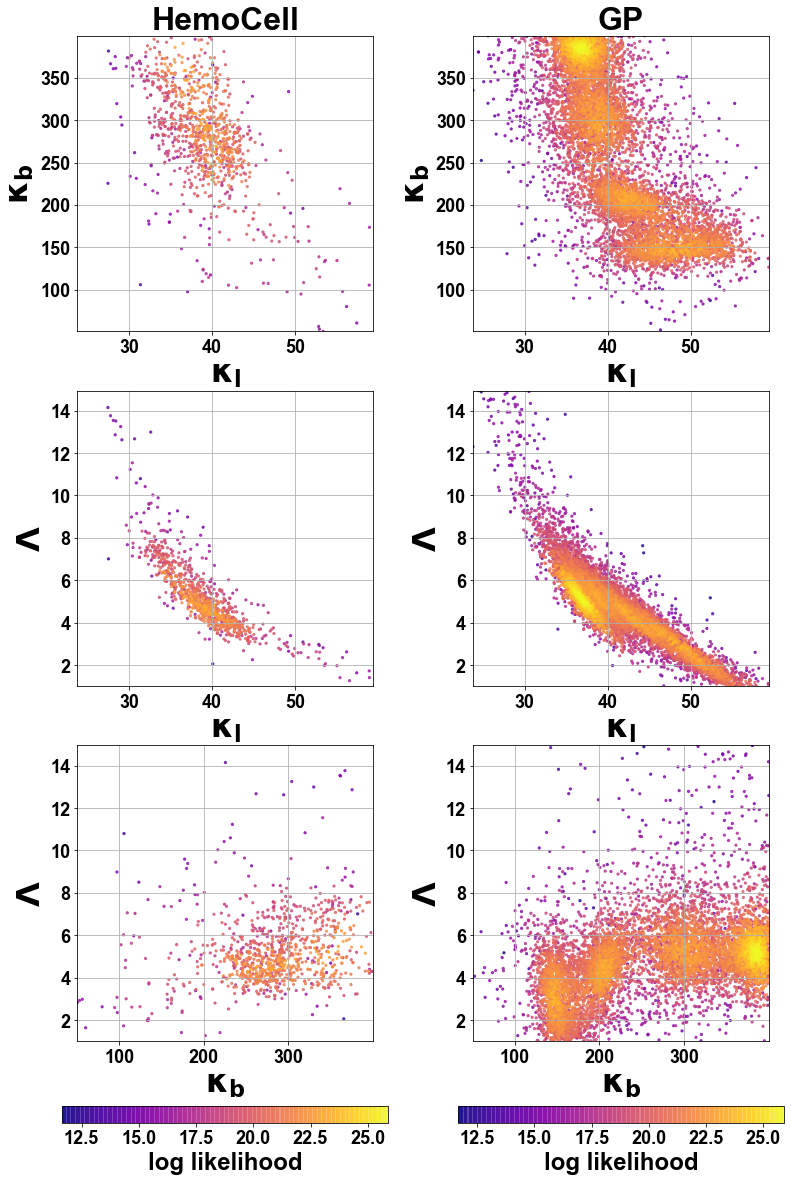

In [17]:
pad = 0.06

ny,nx = 3,2
fig, axs = plt.subplots(ny,nx,figsize=(13,20))
orientation = "horizontal"

flat = axs.flatten()

flat[0].set_title("HemoCell",fontsize=32)
flat[1].set_title("GP",fontsize=32)

count = 2
s = 5

plots = []
for n in range(len(params)):
    for m in range(n,len(params)):
        if n != m:
            HC_vals = HC_df[[params[n],params[m]]].values
            GP_vals = GP_df[[params[n],params[m]]].values
            
            xmin = min(np.min(HC_vals[:,0]),np.min(GP_vals[:,0]))
            xmax = max(np.max(HC_vals[:,0]),np.max(GP_vals[:,0]))
            
            ymin = min(np.min(HC_vals[:,1]),np.min(GP_vals[:,1]))
            ymax = max(np.max(HC_vals[:,1]),np.max(GP_vals[:,1]))
            
            HC_logs = np.log(HC_df["likelihood"].values)
            GP_logs = np.log(GP_df["likelihood"].values)

            vmin = min(np.min(HC_logs),np.min(GP_logs))
            vmax = max(np.max(HC_logs),np.max(GP_logs))
            
            flat[count-2].grid(True)
            flat[count-2].set_xlabel(names[params[n]],fontsize=32)
            flat[count-2].set_ylabel(names[params[m]],fontsize=32)
                
            flat[count-2].set_xlim(xmin,xmax)
            flat[count-2].set_ylim(ymin,ymax)
                
            order = np.argsort(HC_df["likelihood"])
            plots.append(flat[count-2].scatter(HC_df[params[n]].values[order],
                                               HC_df[params[m]].values[order],
                                               s=s,c=np.log(HC_df["likelihood"].values[order]),
                                               vmin=vmin,vmax=vmax,cmap="plasma",alpha=0.75))
            
            x0,x1 = flat[count-2].get_xlim()
            y0,y1 = flat[count-2].get_ylim()
            
            flat[count-2].set_aspect((x1-x0)/(y1-y0))
            
                
            flat[count-1].grid(True)
            flat[count-1].set_xlabel(names[params[n]],fontsize=32)
            flat[count-1].set_ylabel(names[params[m]],fontsize=32)
            
            flat[count-1].set_xlim(xmin,xmax)
            flat[count-1].set_ylim(ymin,ymax)
                
            order = np.argsort(GP_df["likelihood"])
            plots.append(flat[count-1].scatter(GP_df[params[n]].values[order],
                                               GP_df[params[m]].values[order],
                                               s=s,c=np.log(GP_df["likelihood"].values[order]),
                                               vmin=vmin,vmax=vmax,cmap="plasma",alpha=0.75))
            
            x0,x1 = flat[count-1].get_xlim()
            y0,y1 = flat[count-1].get_ylim()
            
            flat[count-1].set_aspect((x1-x0)/(y1-y0))
            
            count += 2
            
fig.colorbar(plots[-2],ax=axs[:,0],fraction=0.015,
             pad=pad,orientation=orientation).set_label(label="log likelihood",size=24)

fig.colorbar(plots[-1],ax=axs[:,1],fraction=0.015,
             pad=pad,orientation=orientation).set_label(label="log likelihood",size=24)

plt.savefig("%s/TMCMC_%s_2D_samples.%s" % (figpath,cellHealth,figformat),dpi=figdpi,bbox_inches="tight")

## 2D Kernel Density Estimations (Left: HemoCell, Right: GP)

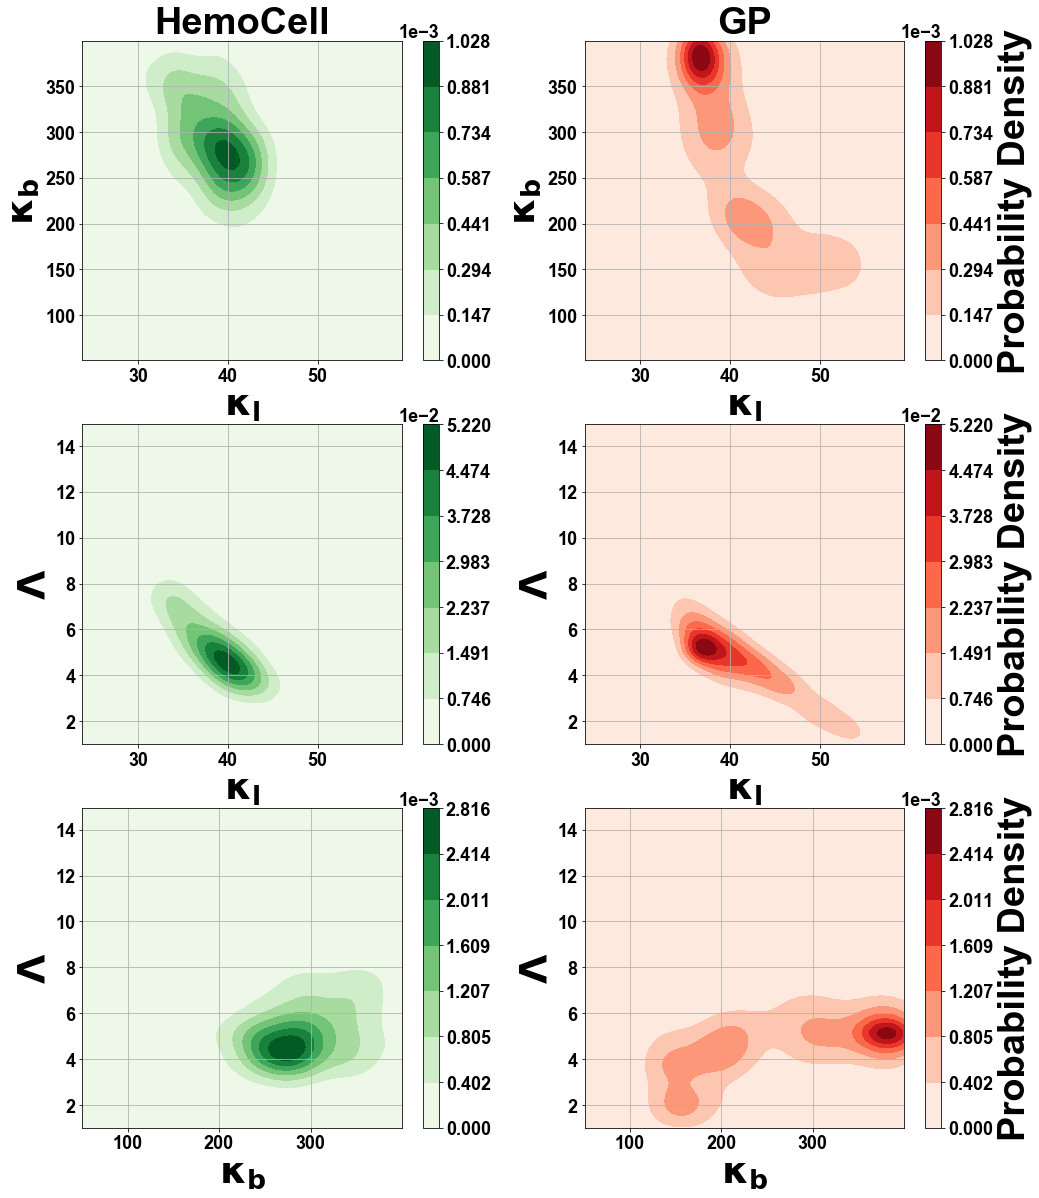

In [18]:
plt.figure(figsize=(16.5,20))
fontsize = 38

count = 1

plots = []
for n in range(len(params)):
    for m in range(n,len(params)):
        if n != m:
            HC_vals = HC_df[[params[n],params[m]]].values
            GP_vals = GP_df[[params[n],params[m]]].values
            
            xmin = min(np.min(HC_vals[:,0]),np.min(GP_vals[:,0]))
            xmax = max(np.max(HC_vals[:,0]),np.max(GP_vals[:,0]))
            
            ymin = min(np.min(HC_vals[:,1]),np.min(GP_vals[:,1]))
            ymax = max(np.max(HC_vals[:,1]),np.max(GP_vals[:,1]))
            
            HC_kde = sm.nonparametric.KDEMultivariate(data=HC_vals,var_type="cc",bw="normal_reference")
            GP_kde = sm.nonparametric.KDEMultivariate(data=GP_vals,var_type="cc",bw="normal_reference")
            
            x = np.linspace(xmin,xmax,100)
            y = np.linspace(ymin,ymax,100)
            xx,yy = np.meshgrid(x,y)
            
            grid_flat = np.column_stack([xx.flatten(),yy.flatten()])
            
            HC_grid_vals = HC_kde.pdf(grid_flat).reshape(xx.shape)
            GP_grid_vals = GP_kde.pdf(grid_flat).reshape(xx.shape)
            
            vmin = min(np.min(HC_grid_vals),np.min(GP_grid_vals))
            vmax = max(np.max(HC_grid_vals),np.max(GP_grid_vals))
            
            levels = np.linspace(vmin,vmax,8)
            
            ax = plt.subplot(3,2,count)
            
            if count == 1:
                plt.title("HemoCell",fontsize=fontsize)
            
            plt.grid(True)
            plt.xlabel(names[params[n]],fontsize=fontsize)
            plt.ylabel(names[params[m]],fontsize=fontsize)
            plt.xlim(xmin,xmax)
            plt.ylim(ymin,ymax)
            
            cont = plt.contourf(xx,yy,HC_grid_vals,vmin=vmin,vmax=vmax,levels=levels,cmap=HC_cmap)
            cbar = plt.colorbar(cont)
                                        
            cbar.formatter.set_powerlimits((-4,-3))
            cbar.update_ticks()
            
            x0,x1 = plt.gca().get_xlim()
            y0,y1 = plt.gca().get_ylim()
            
            plt.gca().set_aspect((x1-x0)/(y1-y0))
            
            count += 1
            
            plt.subplot(3,2,count)
            
            if count == 2:
                plt.title("GP",fontsize=fontsize)
            
            plt.grid(True)
            plt.xlabel(names[params[n]],fontsize=fontsize)
            plt.ylabel(names[params[m]],fontsize=fontsize)
            plt.xlim(xmin,xmax)
            plt.ylim(ymin,ymax)
            
            cont = plt.contourf(xx,yy,GP_grid_vals,vmin=vmin,vmax=vmax,levels=levels,cmap=GP_cmap)
            cbar = plt.colorbar(cont)
                        
            cbar.formatter.set_powerlimits((-4,-3))
            cbar.update_ticks()
            
            cbar.set_label("Probability Density",size=fontsize)
            
            x0,x1 = plt.gca().get_xlim()
            y0,y1 = plt.gca().get_ylim()
            
            plt.gca().set_aspect((x1-x0)/(y1-y0))
                
            count += 1


plt.savefig("%s/TMCMC_%s_2D_kdes.%s" % (figpath,cellHealth,figformat),dpi=figdpi,bbox_inches="tight")

## Uncertainty Propagation

In [19]:
# Get healthy sample data
healthy_samples = pd.read_csv("%s/TMCMC_hemocell_healthy_samples_visc_2_8_lmax_%s_nburn_%i.csv" % 
                              (outputpath,lmax,HC_nburn),sep=";")

healthy_qoi = np.load("%s/TMCMC_hemocell_healthy_qoi_visc_2_8_lmax_%s_nburn_%i.npy" % 
                      (outputpath,lmax,HC_nburn))

healthy_c_err = np.load("%s/TMCMC_hemocell_healthy_c_err_visc_2_8_lmax_%s_nburn_%i.npy" % 
                        (outputpath,lmax,HC_nburn))

# Get treated sample data
treated_samples = pd.read_csv("%s/TMCMC_hemocell_treated_samples_visc_4_10_lmax_%s_nburn_%i.csv" % 
                              (outputpath,lmax,HC_nburn),sep=";")

treated_qoi = np.load("%s/TMCMC_hemocell_treated_qoi_visc_4_10_lmax_%s_nburn_%i.npy" % 
                      (outputpath,lmax,HC_nburn))

treated_c_err = np.load("%s/TMCMC_hemocell_treated_c_err_visc_4_10_lmax_%s_nburn_%i.npy" % 
                        (outputpath,lmax,HC_nburn))

# Load data for comparison with results
data = pd.read_csv("%s/Ekcta_100.csv" % (datapath),sep=";")
data = data.loc[data["Treatment"] == 0.5]

healthy_stress,healthy_el = data.values[2:8,[1,2]].T 
healthy_el_err = np.zeros(healthy_el.shape)
treated_stress,treated_el,treated_el_err = data.values[4:10,[1,3,4]].T

# Get full dataset used
full_healthy_stress,full_healthy_el = data.values[2:10,[1,2]].T 
full_healthy_el_err = np.zeros(full_healthy_el.shape)
full_treated_stress,full_treated_el,full_treated_el_err = data.values[2:10,[1,3,4]].T

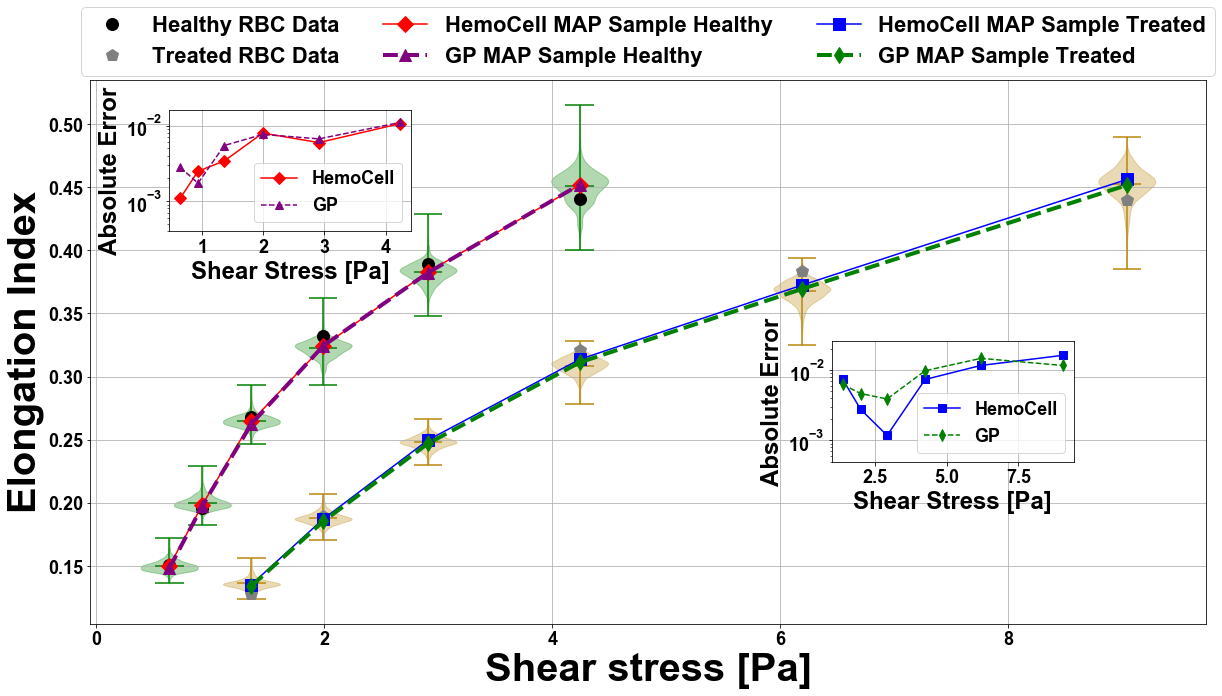

In [20]:
ms = 12

fig = plt.figure(figsize=(20,10))

plt.xlabel("Shear stress [Pa]",fontsize=40)
plt.ylabel("Elongation Index",fontsize=40)

plt.grid(True)

# Data
plt.plot(healthy_stress,healthy_el,"o",markersize=ms,color="black",label="Healthy RBC Data")

plt.plot(treated_stress,treated_el,"p",markersize=ms,color="grey",label="Treated RBC Data")

# MAP samples

## Healthy
mpe = np.argmax(healthy_samples["likelihood"].values * healthy_samples["prior"].values)
mpe_label = "HemoCell MAP Sample Healthy"

plt.plot(healthy_stress,healthy_qoi[mpe],"D-",markersize=ms,color="red",label=mpe_label)

true_mpe_qoi = np.load("%s/TMCMC_GP_healthy_qoi_visc_2_8_lmax_%s_nburn_%i_mpe_sample.npy" % 
                       (outputpath,lmax,GP_nburn)).flatten()

true_mpe_c_err = np.load("%s/TMCMC_GP_healthy_c_err_visc_2_8_lmax_%s_nburn_%i_mpe_sample.npy" % 
                         (outputpath,lmax,GP_nburn)).flatten()

plt.plot(healthy_stress,true_mpe_qoi,"^--",markersize=ms,color="purple",linewidth=4,label="GP MAP Sample Healthy")

HC_err_healthy = abs(healthy_qoi[mpe] - healthy_el)
GP_err_healthy = abs(true_mpe_qoi - healthy_el)

## Treated

mpe = np.argmax(treated_samples["likelihood"].values * treated_samples["prior"].values)
mpe_label = "HemoCell MAP Sample Treated"

plt.plot(treated_stress,treated_qoi[mpe],"s-",markersize=ms,color="blue",label=mpe_label)

true_mpe_qoi = np.load("%s/TMCMC_GP_treated_qoi_visc_4_10_lmax_%s_nburn_%i_mpe_sample.npy" % 
                       (outputpath,lmax,GP_nburn)).flatten()

true_mpe_c_err = np.load("%s/TMCMC_GP_treated_c_err_visc_4_10_lmax_%s_nburn_%i_mpe_sample.npy" % 
                         (outputpath,lmax,GP_nburn)).flatten()

plt.plot(treated_stress,true_mpe_qoi,"d--",markersize=ms,color="green",linewidth=4,label="GP MAP Sample Treated")

HC_err_treated = abs(treated_qoi[mpe] - treated_el)
GP_err_treated = abs(true_mpe_qoi - treated_el)

# Healthy violin
violin_parts = plt.violinplot(healthy_qoi,healthy_stress,showmeans=True)

for partname in ['cbars','cmins','cmaxes','cmeans']:
    vp = violin_parts[partname]
    vp.set_edgecolor("green")

for vp in violin_parts["bodies"]:
    vp.set_facecolor("green")
    vp.set_edgecolor("green")

# Treated violin
violin_parts = plt.violinplot(treated_qoi,treated_stress,showmeans=True)

pretentious_color = "darkgoldenrod"
for partname in ['cbars','cmins','cmaxes','cmeans']:
    vp = violin_parts[partname]
    vp.set_edgecolor(pretentious_color)

for vp in violin_parts["bodies"]:
    vp.set_facecolor(pretentious_color)
    vp.set_edgecolor(pretentious_color)

plt.legend(loc='upper center',bbox_to_anchor=(0.5,1.155),ncol=3,fontsize=22)

# Inset Healthy
ax_inset = fig.add_axes([0.18,0.67,0.168,0.168])
ax_inset.set_xlabel("Shear Stress [Pa]",fontsize=24)
ax_inset.set_ylabel("Absolute Error",fontsize=24)
ax_inset.set_yscale("log")
plt.ylim(4e-4,max(np.max(HC_err_healthy), np.max(GP_err_healthy))+5e-3)
ax_inset.grid(True)
ax_inset.plot(healthy_stress,HC_err_healthy,"D-",markersize=8,color="red",label="HemoCell")
ax_inset.plot(healthy_stress,GP_err_healthy,"^--",markersize=8,color="purple",label="GP")
ax_inset.legend(loc="lower right",fontsize=18)

# Inset Treated
ax_inset = fig.add_axes([0.64,0.35,0.168,0.168])
ax_inset.set_xlabel("Shear Stress [Pa]",fontsize=24)
ax_inset.set_ylabel("Absolute Error",fontsize=24)
ax_inset.set_yscale("log")
plt.ylim(5e-4,max(np.max(HC_err_treated), np.max(GP_err_treated))+1e-2)
ax_inset.grid(True)
ax_inset.plot(treated_stress,HC_err_treated,"s-",markersize=8,color="blue",label="HemoCell")
ax_inset.plot(treated_stress,GP_err_treated,"d--",markersize=8,color="green",label="GP")
ax_inset.legend(loc="lower right",fontsize=18)

plt.savefig("%s/TMCMC_propagation.%s" % (figpath,figformat),dpi=figdpi,bbox_inches="tight")

# Convergence plots

In [21]:
imin = 0
imax = 10

stress,el = data.values[imin:imax,[1,2]].T
el_err = np.zeros(imax-imin)

healthy_qoi = np.load("%s/convergence_qoi_visc_%i_%i_15_80_5.npy" % (outputpath,imin,imax))
rigid_qoi = np.load("%s/convergence_qoi_visc_%i_%i_100_80_5.npy" % (outputpath,imin,imax))

# Get data from config files
configpath = "%s/hemocell/templates/config_template.xml" % (libpath)
tree = etree.parse(configpath, parser=etree.XMLParser(remove_blank_text=True, remove_comments=True))
root = tree.getroot()
nuP = float(root.find("domain/nuP").text)
rhoP = float(root.find("domain/rhoP").text)

shearrate = stress / (nuP * rhoP)

threshold = 18

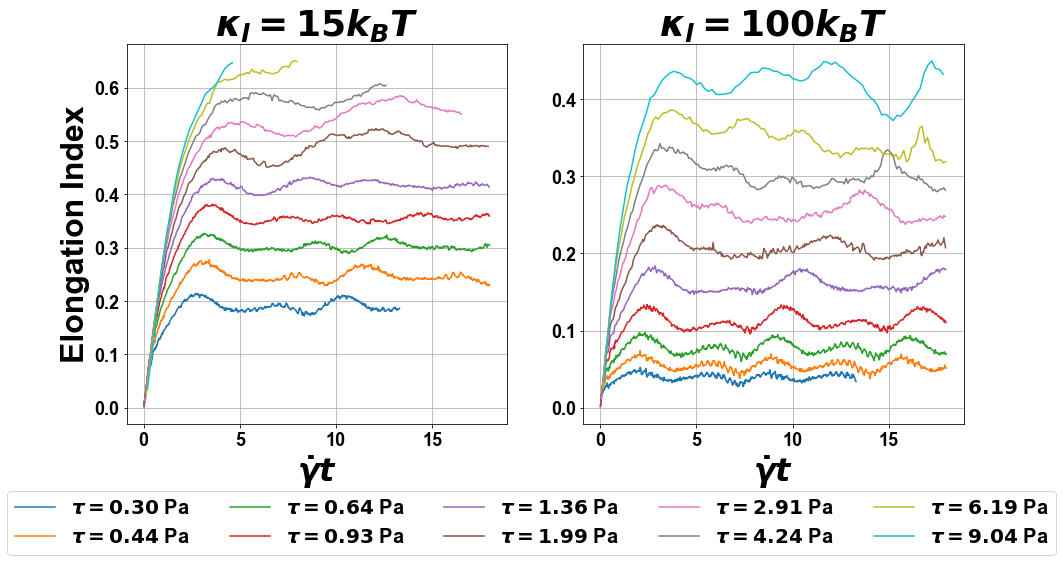

In [22]:
plt.figure(figsize=(15,9))
fig1 = plt.subplot(1,2,1)
plt.title(r"$\kappa_l = 15 k_B T$",fontsize=36)
plt.xlabel(r"$\dot{\gamma} t$",fontsize=32)
plt.ylabel(r"Elongation Index",fontsize=32,fontweight="bold")
plt.grid(True)

for n in range(10):
    steps = np.arange(500,1000001,500)[healthy_qoi[:,n] > 0]
    qoi = healthy_qoi[:,n][healthy_qoi[:,n] > 0]
    
    full_x_vals = steps * 0.5e-7 * shearrate[n]
    
    x_vals = full_x_vals[full_x_vals < threshold]
    y_vals = qoi[full_x_vals < threshold]
    
    plt.plot(x_vals,y_vals,label=r"$\tau = %.2f$ Pa" % (stress[n]))

x0,x1 = plt.gca().get_xlim()
y0,y1 = plt.gca().get_ylim()
plt.gca().set_aspect((x1-x0)/(y1-y0))

fig2 = plt.subplot(1,2,2)
plt.title(r"$\kappa_l = 100 k_B T$",fontsize=36)
plt.xlabel(r"$\dot{\gamma} t$",fontsize=32)
plt.grid(True)

for n in range(10):
    steps = np.arange(500,1000001,500)[rigid_qoi[:,n] > 0]
    qoi = rigid_qoi[:,n][rigid_qoi[:,n] > 0]
    
    full_x_vals = steps * 0.5e-7 * shearrate[n]
    
    x_vals = full_x_vals[full_x_vals < threshold]
    y_vals = qoi[full_x_vals < threshold]
    
    plt.plot(x_vals,y_vals,label=r"$\tau = %.2f$ Pa" % (stress[n]))

x0,x1 = plt.gca().get_xlim()
y0,y1 = plt.gca().get_ylim()
plt.gca().set_aspect((x1-x0)/(y1-y0))
    
fig1.legend(loc='lower left',bbox_to_anchor=(-0.34,-0.37),ncol=5,fontsize=20)
plt.savefig("%s/EL_convergence.%s" % (figpath,figformat),dpi=figdpi,bbox_inches="tight")